In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta  # added by DK

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)


# reflect the tables
hawaii = Base.classes.keys()

In [23]:
# View all of the classes that automap found
hawaii

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

C:\Users\SFPD7\AppData\Local\Temp\ipykernel_26212\334926079.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


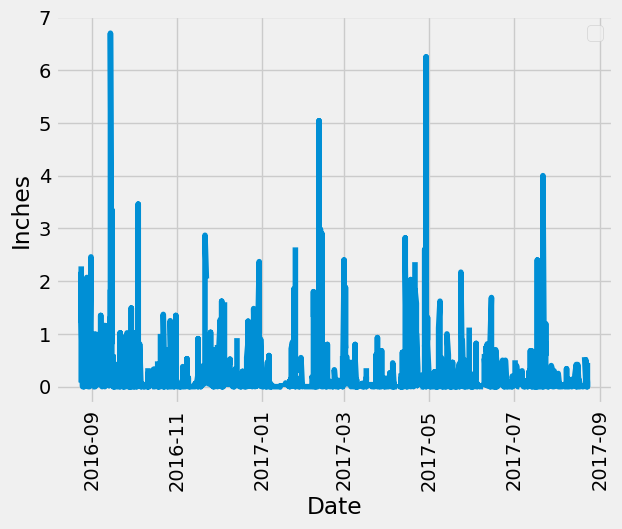

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date_convert = datetime.strptime(latest_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago_date = latest_date_convert - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['date'], precipitation_df['prcp'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Inches')
#plt.title('Precipitation in the Last 12 Months')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
#plt.tight_layout()
plt.show()


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats_df = summary_stats.to_frame().reset_index()
summary_stats_df.columns = ['', 'precipitation']

summary_stats_df



,,precipitation
0,count,2015.000000
1,mean,0.176462
2,std,0.460288
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()
total_stations

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count'))\
                         .group_by(Measurement.station)\
                         .order_by(func.count(Measurement.station).desc())\
                         .all()

active_stations_df = pd.DataFrame(active_stations, columns=['Station', 'Count'])

active_stations_df

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Extract the most active station ID from the previous results
most_active_station_id = active_stations[0][0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs).label('Lowest Temperature'),
    func.max(Measurement.tobs).label('Highest Temperature'),
    func.avg(Measurement.tobs).label('Average Temperature')
).filter(Measurement.station == most_active_station_id).first()

# Convert the results to a DataFrame for better display
temperature_stats_df = pd.DataFrame([temperature_stats], columns=['Lowest Temperature', 'Highest Temperature', 'Average Temperature'])

temperature_stats_df


,Lowest Temperature,Highest Temperature,Average Temperature
0,54.0,85.0,71.663781


C:\Users\SFPD7\AppData\Local\Temp\ipykernel_26212\3724681375.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


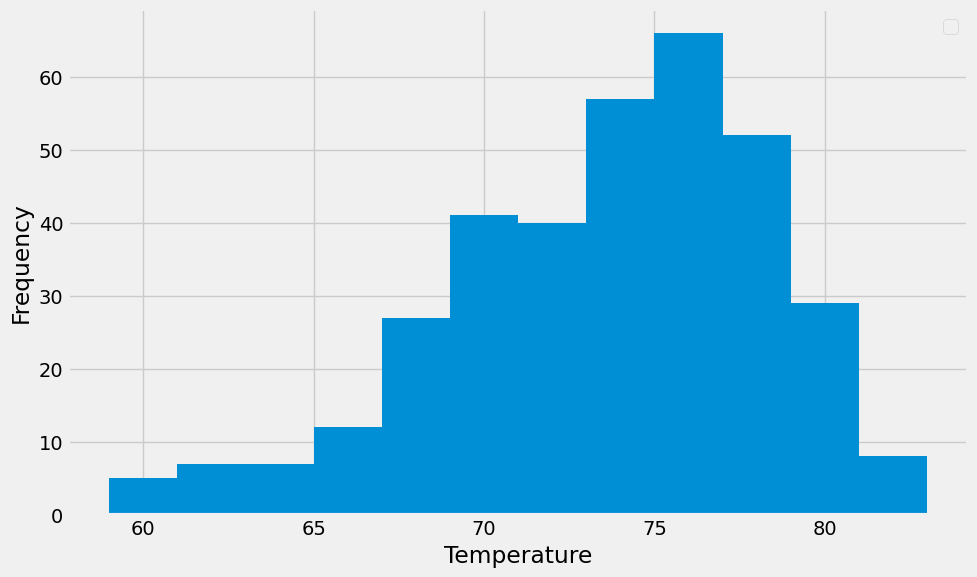

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temperature_data = session.query(Measurement.date, Measurement.tobs)\
                          .filter(Measurement.station == most_active_station_id)\
                          .filter(Measurement.date >= one_year_ago_date)\
                          .order_by(Measurement.date).all()

# Convert the results to a DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Close Session

In [45]:
# Close Session
session.close()